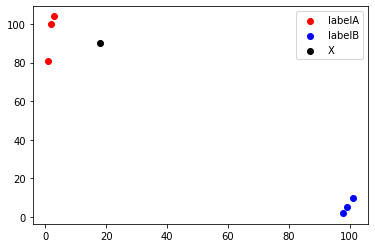

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import operator

#已知分類的數據
x1 = np.array([3,2,1])
y1 = np.array([104,100,81])
x2 = np.array([101,99,98])
y2 = np.array([10,5,2])
scatter1 = plt.scatter(x1,y1,c="r")
scatter2 = plt.scatter(x2,y2,c="b")

#未知數據
x = np.array([18])
y = np.array([90])
scatter3 = plt.scatter(x,y,c="k")

#劃出圖例
plt.legend(handles=[scatter1,scatter2,scatter3],labels=['labelA','labelB','X'],loc='best')
plt.show()


In [29]:
#已知分類的數據
x_data = np.array([[3,104],
                  [2,100],
                  [1,81],
                  [101,10],
                  [99,5],
                  [81,2]])
y_data = np.array(['A','A','A','B','B','B'])
x_test = np.array([18,90])


In [30]:
#計算樣本數量
x_data_size = x_data.shape[0]
x_data_size

6

In [31]:
#複製x_test
np.tile(x_test, (x_data_size,1)) #複製6行 1列

array([[18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90]])

In [32]:
#計算x_test與每一個點的差
diffMat = np.tile(x_test, (x_data_size,1)) - x_data
diffMat

array([[ 15, -14],
       [ 16, -10],
       [ 17,   9],
       [-83,  80],
       [-81,  85],
       [-63,  88]])

In [38]:
#平方
sqDiffMat = diffMat**2
sqDiffMat

array([[ 225,  196],
       [ 256,  100],
       [ 289,   81],
       [6889, 6400],
       [6561, 7225],
       [3969, 7744]], dtype=int32)

In [34]:
#相加
sqDistances = sqDiffMat.sum(axis=1)
sqDistances

array([  421,   356,   370, 13289, 13786, 11713], dtype=int32)

In [37]:
#開根號
distances = sqDistances**0.5
distances

array([ 20.51828453,  18.86796226,  19.23538406, 115.27792503,
       117.41379817, 108.2266141 ])

In [39]:
#從小到大排序
sortedDistances = distances.argsort() #依照索引排序
sortedDistances

array([1, 2, 0, 5, 3, 4], dtype=int64)

In [41]:
classCount = {}
#設置k
k = 5
for i in range(k):
    #獲取標籤
    votelabel = y_data[sortedDistances[i]]
    #統計標籤數量
    classCount[votelabel] =classCount.get(votelabel,0) +1

classCount

{'A': 3, 'B': 2}

In [42]:
#根據operator.itemgetter(1) -第一個值對classCount排序,然後再取倒序
sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
sortedClassCount
#由於排序完後不一定會依序出現所需要的值 故需要用這種方式來做排序

[('A', 3), ('B', 2)]

In [43]:
knnclass = sortedClassCount[0][0]
knnclass

'A'

In [ ]:
https://www.youtube.com/watch?v=04MR_rSek4c&list=PLzw77domqr9s5upGq1vaCZK2dO1_0ir0p&index=41&ab_channel=%E8%A6%83%E7%A7%89%E4%B8%B0